In [2]:
%matplotlib inline

In [113]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [114]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
Mouse_data= pd.read_csv(mouse_drug_data_to_load)
Drug_data = pd.read_csv(clinical_trial_data_to_load)

In [115]:
Mouse_data

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [116]:
Drug_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [117]:
# Combine the data into a single dataset
combined_data = pd.merge(Mouse_data,Drug_data, on="Mouse ID")
combined_data

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [118]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_groups/
tumor_response = combined_data.groupby(['Drug','Timepoint']).mean()
test_1=tumor_response.drop(columns = ['Metastatic Sites'])
test_1
# Convert to DataFrame

# Preview DataFrame



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [119]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepointt
tumor__sem_response = combined_data.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame

# Preview DataFrame
tumor_response_1=pd.DataFrame(tumor__sem_response)
tumor_response_1

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [120]:
re_format_1 = test_1.unstack(level=0)

re_format_2 = tumor_response_1.pivot_table(values ="Tumor Volume (mm3)", index ="Timepoint", columns ="Drug")
df2 = re_format_2[["Capomulin","Infubinol","Ketapril","Placebo"]]
df1 = test_1.pivot_table(values ="Tumor Volume (mm3)", index ="Timepoint", columns ="Drug")
df1 = df1[["Capomulin","Infubinol","Ketapril","Placebo"]]
re_format_1.head(5)


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

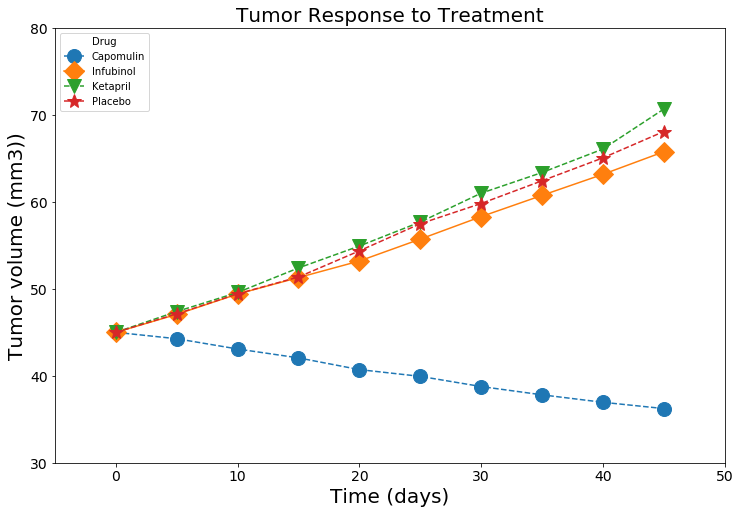

In [121]:
ax = df2.plot(figsize=(12,8), yerr = df2, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
df1.plot(figsize=(12,8), style=['o--', 'D-', 'v--', '*--'], markersize=14, ax = ax)

plt.title("Tumor Response to Treatment").set_size(20)
plt.xlabel("Time (days)")
plt.ylabel("Tumor volume (mm3))")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-5, 50)
plt.ylim(30, 80)

plt.savefig("tumor_response.png")
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [122]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
test_3 = combined_data.groupby(['Drug','Timepoint']).mean()
metastatic_response = test_3.drop(columns = ['Tumor Volume (mm3)'])
# Convert to DataFrame
metastatic_response_1 = pd.DataFrame(metastatic_response)
# Preview DataFrame
metastatic_response_1

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [123]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_response_standerr = combined_data.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
stan = pd.DataFrame(metastatic_response_standerr)
# Preview DataFrame
stan

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [124]:
re_format_2 = test_1.unstack(level=0)
# Preview that Reformatting worked
df3 = metastatic_response_1.pivot_table(values ="Metastatic Sites", index ="Timepoint", columns ="Drug")
df3 = df3[["Capomulin","Infubinol","Ketapril","Placebo"]]
df4=re_format_2.pivot_table(values ="Tumor Volume (mm3)", index ="Timepoint")
df4 = df4
re_format_2.head(5)

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

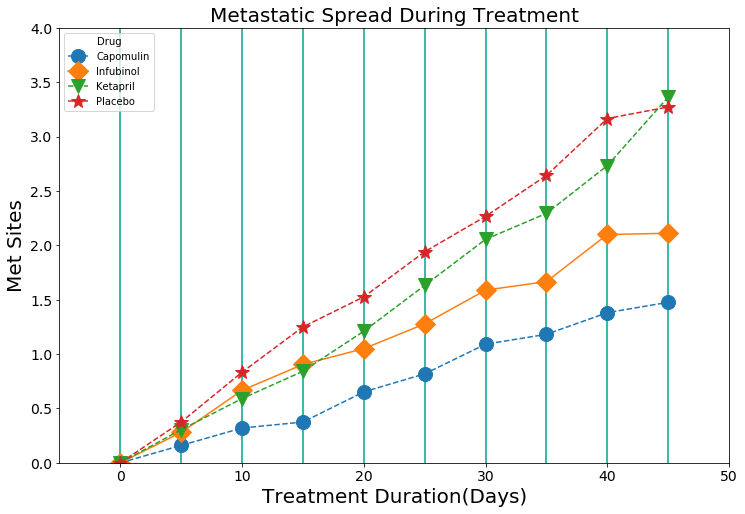

In [125]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
ax = df4.plot(figsize=(12,8), yerr = df4, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
df3.plot(figsize=(12,8), style=['o--', 'D-', 'v--', '*--'], markersize=14, ax = ax)

plt.title("Metastatic Spread During Treatment").set_size(20)
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met Sites")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-5, 50)
plt.ylim(0, 4)

plt.savefig("MetastaticSpread")
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [128]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
test_4 = combined_data.groupby(['Drug','Timepoint']).count()['Mouse ID']

# Convert to DataFrame
survival_rates = pd.DataFrame(test_4)
# Preview DataFrame
survival_rates

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [139]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_format = survival_rates.unstack(level=0)

# Preview the Data Frame
Mouse_format.head(5)



Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [144]:
df5 = df5[["Capomulin","Infubinol","Ketapril","Placebo"]]
df5['Capomulin '] = (df5['Capomulin']/25)*100
df5['Infubinol '] = (df5['Infubinol']/25)*100
df5['Ketapril '] = (df5['Ketapril']/25)*100
df5['Placebo '] = (df5['Placebo']/25)*100
df_survival = df5[['Capomulin ', 'Infubinol ', 'Ketapril ', 'Placebo ']]

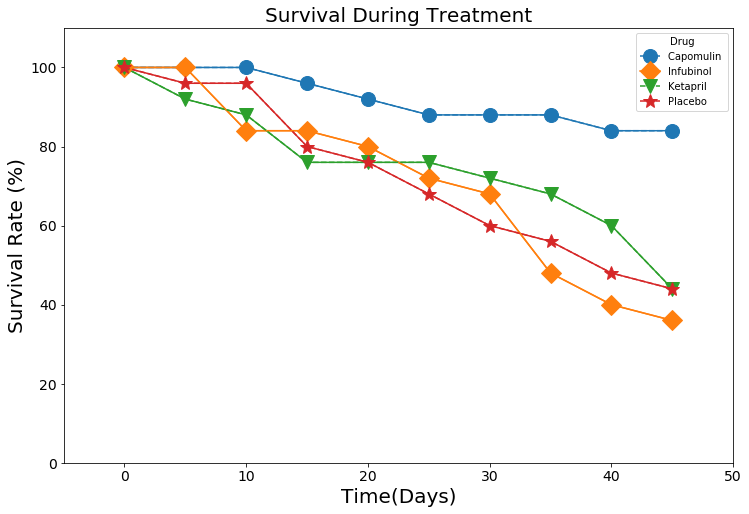

In [153]:

# Show the Figure
ax = df_survival.plot(figsize=(12,8), legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
df_survival.plot(figsize=(12,8), style=['o--', 'D-', 'v--', '*--'], markersize=14, ax = ax)

plt.title("Survival During Treatment").set_size(20)
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-5, 50)
plt.ylim(0, 110)

plt.savefig("MetastaticSpreadduringtreatment")
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [155]:
# Calculate the percent changes for each drug
#re_format.drop['Tumor Volume (mm3)']
perc_changed= ((re_format_1.loc[45,:] - re_format_1.loc[0,:])/re_format_1.loc[0,:] * 100)

# Display the data to confirm
perc_changed

                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

In [210]:
# Store all Relevant Percent Changes into a Tuple
percent_change =percent_change[["Capomulin","Infubinol","Ketapril","Placebo"]]
percent_change.head()

Series([], dtype: float64)

IndexError: tuple index out of range

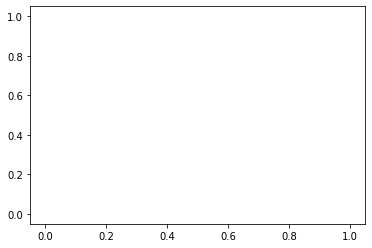

In [216]:


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure

ax=plt.bar(label_1,b,facecolor="red")
ax[0].set_color('g')
plt.ylabel("% Tumor volume change").set_size(10)
plt.xlabel("Drug").set_size(10)
plt.title("Tumor volume change over 45 days treatment").set_size(10)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.axhline(0, color='grey')

plt.savefig("tumor_change.png")
plt.show()


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)